# Etudes des données provenant de google trends

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df_gt=pd.read_csv("google_trends_fr_1.csv")
df_gt

,date,value,variable
0,2017-01-01,9.00,aeroport paris_cat_voyages
1,2017-01-02,3.78,aeroport paris_cat_voyages
2,2017-01-03,3.96,aeroport paris_cat_voyages
3,2017-01-04,2.79,aeroport paris_cat_voyages
4,2017-01-05,3.24,aeroport paris_cat_voyages
...,...,...,...
47295,2021-12-27,7.80,mucem theme
47296,2021-12-28,0.00,mucem theme
47297,2021-12-29,5.28,mucem theme
47298,2021-12-30,8.04,mucem theme


In [3]:
df_gt2 = df_gt.reset_index().pivot_table(values = "value", index = "date", columns = "variable")
df_gt2=df_gt2.reset_index()
df_gt2

variable,date,aeroport nice cote d azur theme_cat_voyages,aeroport paris_cat_voyages,cote d azur theme_cat_voyages,disneyland paris hotel_cat_voyages,disneyland paris theme_cat_voyages,disneyland paris_cat_voyages,french riviera_cat_voyages,louvre_cat_voyages,lyon gare_cat_voyages,...,marseille_cat_voyages,mucem theme,nice airport_cat_voyages,nice hotel_cat_voyages,nice_cat_voyages,paris gare_cat_voyages,paris hotel_cat_voyages,paris restaurant_cat_voyages,paris_cat_voyages,promenade des anglais_cat_voyages
0,2017-01-01,7.03,9.00,7.79,50.32,35.51,52.92,0.00,13.11,12.00,...,36.72,5.88,6.45,4.03,22.88,26.79,15.18,7.04,38.70,0.0
1,2017-01-02,13.87,3.78,22.96,23.12,47.17,56.07,0.00,9.43,30.24,...,49.68,2.52,10.80,10.23,26.84,22.23,20.47,11.44,39.99,4.0
2,2017-01-03,13.30,3.96,15.58,51.00,39.22,47.88,0.00,4.37,25.92,...,36.18,0.00,6.75,16.12,25.08,31.92,16.10,44.00,35.69,0.0
3,2017-01-04,15.20,2.79,12.30,29.24,35.51,44.10,0.00,8.97,38.40,...,38.88,0.00,5.10,22.63,26.84,21.09,23.00,33.00,35.69,0.0
4,2017-01-05,15.39,3.24,15.99,55.76,34.45,39.69,0.00,9.20,12.96,...,54.00,2.38,5.25,13.02,21.12,35.91,15.41,33.44,34.83,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2021-12-27,7.41,3.60,9.84,11.88,34.78,40.32,4.81,13.50,30.24,...,13.26,7.80,3.10,7.70,19.20,42.00,10.78,33.88,27.00,0.0
1822,2021-12-28,5.20,4.00,7.20,13.50,37.00,38.88,4.68,14.25,48.00,...,11.31,0.00,2.00,7.56,14.70,23.52,10.78,39.16,22.41,0.0
1823,2021-12-29,9.49,4.50,17.28,20.52,32.93,41.76,4.81,11.40,7.20,...,10.14,5.28,4.10,13.44,15.00,39.06,10.34,28.60,23.49,0.0
1824,2021-12-30,9.75,4.15,22.80,3.51,30.34,33.12,0.00,8.55,24.00,...,7.80,8.04,4.20,3.92,15.30,30.66,7.48,20.24,22.68,0.0


## Matrice des corrélations: étude des liens entre les variables

Text(0.5, 1.0, 'Matrice des corrélations entre les différentes variables des google trends')

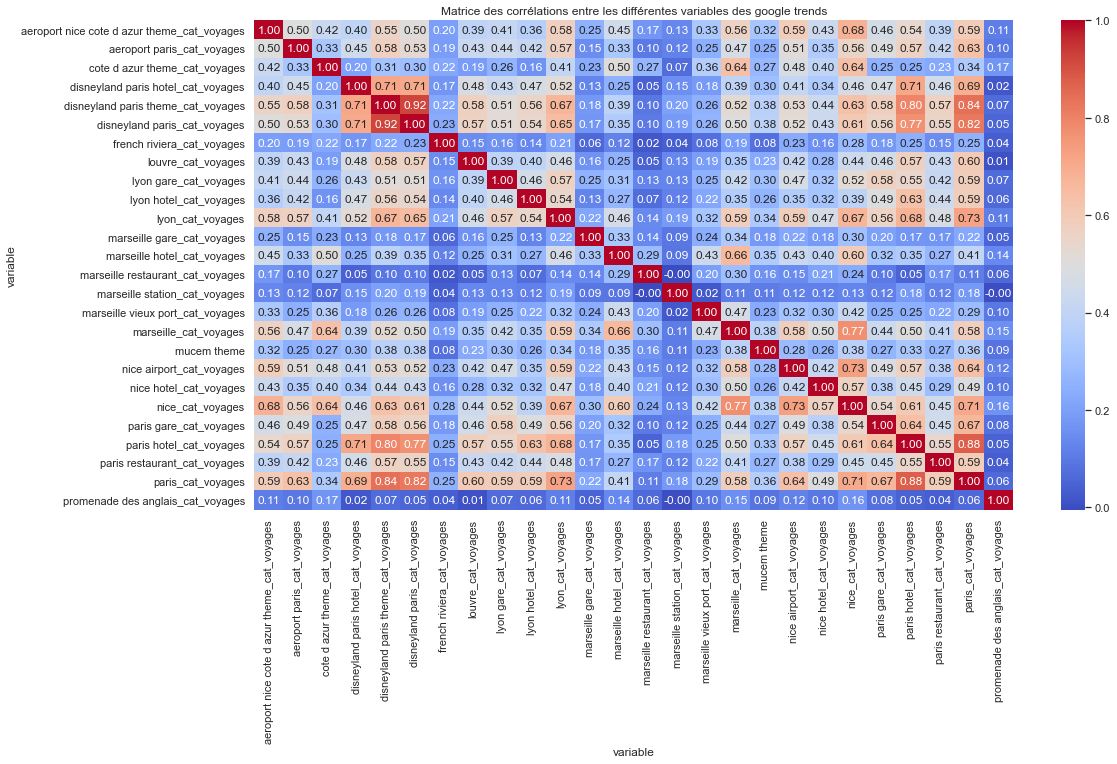

In [4]:
# je définis la taille de la matrice 
sns.set(rc = {'figure.figsize':(17,9)})
# Je veux deux chiffres après la virgule
sns.heatmap(df_gt2.corr(), cmap='coolwarm', annot=True, fmt=".2f") 
plt.title("Matrice des corrélations entre les différentes variables des google trends")

Globalement, les variables semblent plutôt peu corrélées entre elles (à l'exception des différentes activités au sien d'une même ville).

## Le cas des requêtes parisiennes

In [5]:
df_gt_paris = df_gt[df_gt.variable.str.contains('paris|Louvre', case=False)]
df_gt_paris = df_gt_paris.reset_index().pivot_table(values = "value", index = "date", columns = "variable")
df_gt_paris=df_gt_paris.reset_index()

Text(0.5, 1.0, 'Matrice des corrélations entre les différentes variables des google trends - Paris uniquement')

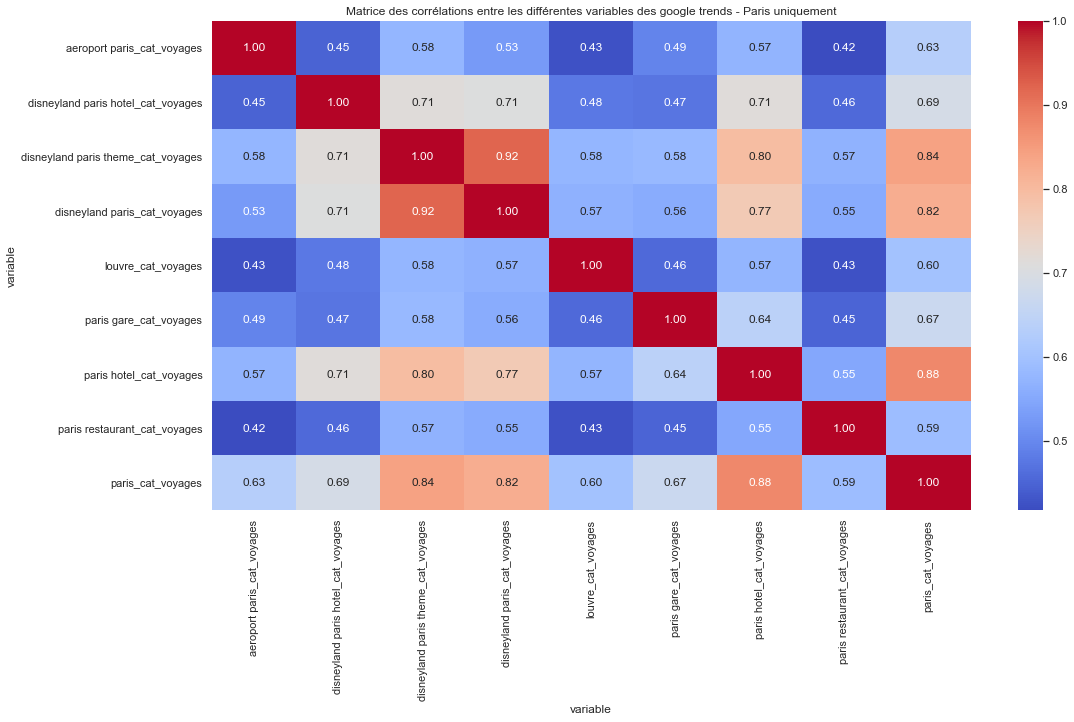

In [6]:
# je définis la taille de la matrice 
sns.set(rc = {'figure.figsize':(17,9)})
# Je veux deux chiffres après la virgule
sns.heatmap(df_gt_paris.corr(), cmap='coolwarm', annot=True, fmt=".2f") 
plt.title("Matrice des corrélations entre les différentes variables des google trends - Paris uniquement")

## Analyse en composantes principales (ACP)
Le but d'une ACP est de synthétiser un maximum l'information obtenue.Le but de cette analyse est de résumer l'information en la rendant plus lisibile au travers d'une diminution de dimension. 

In [7]:
df_gt3=df_gt2.drop(['date'], axis = 1)

In [8]:
df_gt3=df_gt3.dropna()
df_gt3=df_gt3.T

In [9]:
pca = PCA(n_components=2)
print(pca.fit(df_gt3))
pca.explained_variance_ratio_

PCA(n_components=2)


array([0.70075082, 0.06498692])

Le premier axe explique l'essentiel de la variance. 

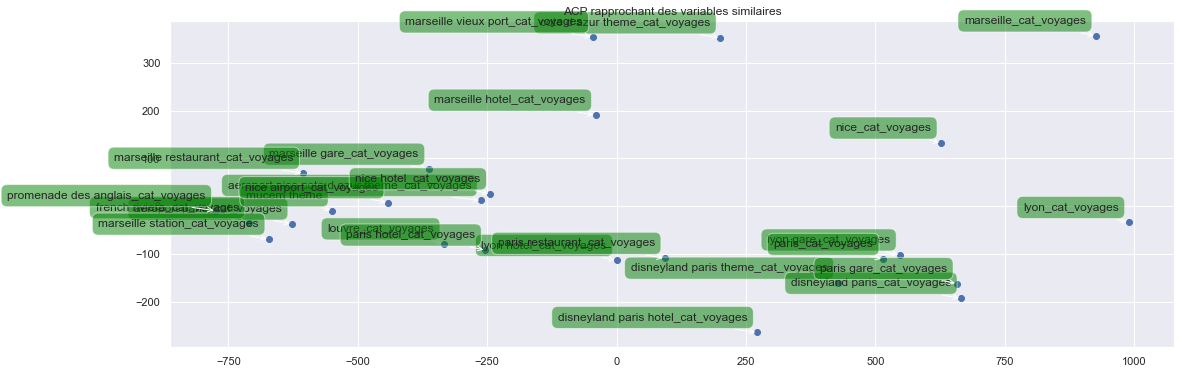

In [10]:
X_reduced = pca.transform(df_gt3)
plt.figure(figsize=(18, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

for label, x, y in zip(df_gt3.index, X_reduced[:, 0], X_reduced[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='green', alpha=0.5),
        arrowprops = dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
plt.title("ACP rapprochant des variables similaires");